XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                    0 / width of table in bytes                        NAXIS2  =                    0 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    0 / number of fields in each row                   EXTNAME = 'BROADBAND'          / name of this binary table extension            HISTORY This file was created by Sunrise (broadband) version , on Tue Sep 10 10:HISTORY 59:52 2019 by user rebecca.nevin on host c25a-s37.                      DATE    = '2019-09-10T14:59:52' / file creation date (YYYY-MM-DDThh:mm:ss UT)   HIERARCH configfile= '/ufrc/lblecha/rebe

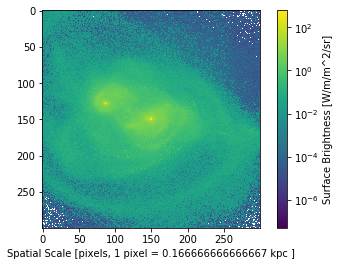

In [14]:
import astropy.io.fits as fits
import pyfits
import matplotlib.pyplot as plt
import matplotlib

im = fits.open('broadband_files/broadband_185.fits')


# Within the broadband_xxx.fits file, there are multiple extensions for each viewpoint
viewpt = 0 # Viewpoints are 0-6, so there are 7
# There are ways to look more in detail at what these viewing angles are, what the setup
# of the simulation is, etc, see the SUNRISE wiki for information on the broadband files

# This opens the broadband images
camera_data=im['CAMERA'+str(viewpt)+'-BROADBAND'].data

# Prints the header
#print(im['CAMERA'+str(viewpt)+'-BROADBAND'].header)

# This header tells you where to find the filter list:
#print(im['BROADBAND'].header)
 
# This tells you the pixelscale in kpc per pixel
pixelscale =  im['CAMERA'+str(viewpt)+'-BROADBAND'].header['CD1_1']


# So the file is named '185' but the actual moment in time is found here:
myr_actual=im['SFRHIST'].header['SNAPTIME']/10**9

# There are a million different broadband filters in these files
r_band = 2 # this is the SDSS r-band, which is what I used for my previous paper
# this file only has sdss g, i, r, u, z
# I'm going to try to get you some HST files
r_band_image = camera_data[r_band]

plt.clf()
plt.imshow(r_band_image, norm=matplotlib.colors.LogNorm())
plt.colorbar(label = 'Surface Brightness [W/m/m^2/sr]')
plt.xlabel('Spatial Scale [pixels, 1 pixel = '+str(im['CAMERA'+str(viewpt)+'-BROADBAND'].header['CD1_1'])+' kpc ]')
plt.show()


# I have a whole separate pipeline to do things like clip the image to 
# a certain spatial scale and convolve it etc
# see -->
# https://github.com/beckynevin/Kinematics_and_Imaging_Merger_Identification/blob/master/GalaxySmelter_Fake_rebin_Vicente.py